In [36]:
import keras
from keras.datasets import reuters
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
train_data.shape

(8982,)

In [5]:
test_data.shape

(2246,)

In [7]:
print(len(train_data[0]))
print(len(train_data[1]))


87
56


The dataset has 8982 instances in training dataset and 2246 in test and each one is a list of indices based on the word orders in the vocabulary. Here we have selected the top-10000 words

In [11]:
max([max(row) for row in train_data])

9999

Hence we can use a one hot encoder with size 10000 and use it for our purpose.

In [18]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
decoded_newswire

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [15]:
# Let us write a function
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for  i, sequence in enumerate(sequences):
        results[i,sequence]=1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [20]:
y_train.shape

(8982, 46)

In [25]:
# An alternative to the above function using in-built functions
from tensorflow.keras.utils import to_categorical
y_train_tmp = to_categorical(train_labels)
y_test_tmp = to_categorical(test_labels)

In [26]:
y_train_tmp.shape

(8982, 46)

In [27]:
y_train_tmp[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [31]:
model = models.Sequential()
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

/mnt/hdd/StudySpace/DL_Chollet/venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2024-11-28 21:07:32.728980: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [32]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

In [33]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

In [34]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20


2024-11-28 21:08:44.339361: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 319280000 exceeds 10% of free system memory.


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.3878 - loss: 3.1412 - val_accuracy: 0.6200 - val_loss: 1.7584
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.6634 - loss: 1.6024 - val_accuracy: 0.6860 - val_loss: 1.3661
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.7407 - loss: 1.2313 - val_accuracy: 0.7340 - val_loss: 1.1906
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7850 - loss: 0.9885 - val_accuracy: 0.7650 - val_loss: 1.0630
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8261 - loss: 0.8178 - val_accuracy: 0.7740 - val_loss: 1.0135
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8514 - loss: 0.6795 - val_accuracy: 0.8040 - val_loss: 0.9398
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.8831 - loss: 0.5414 - val_accuracy: 0.7900 - val_loss: 0.9313
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.9083 - loss: 0.4533 - val_accuracy: 0.8070 - val_loss: 0.

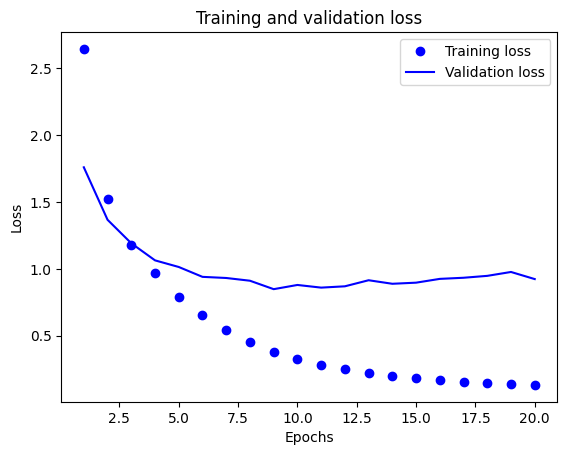

In [37]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

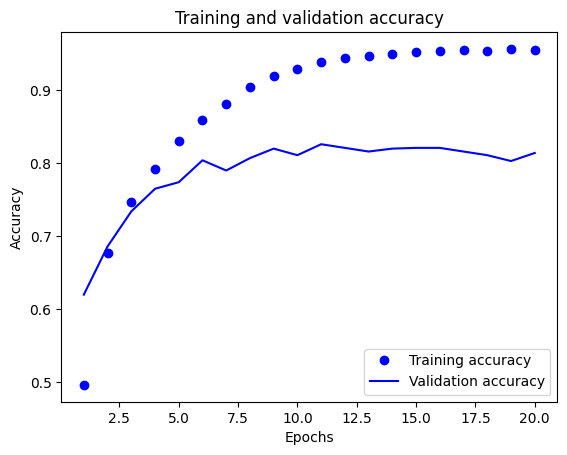

In [38]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

In [40]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [41]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, epochs=9, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9


2024-11-28 21:14:25.719314: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 359280000 exceeds 10% of free system memory.


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.3997 - loss: 3.1618
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6768 - loss: 1.5443
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7590 - loss: 1.1346
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8037 - loss: 0.9180
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8384 - loss: 0.7411
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8677 - loss: 0.6115
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8935 - loss: 0.4960
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9115 - loss: 0.4211
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9215 - loss: 0.3715
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8064 - loss: 0.8721


In [42]:
results

[0.9089116454124451, 0.7956367135047913]

## The importance of having sufficiently large intermediate layers

In this case, we have 46 classes and we need to choose the hidden layer units large than this otherwise there will be a information bottleneck.

In [44]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
    ])
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])
model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20


2024-11-28 21:19:13.108240: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 319280000 exceeds 10% of free system memory.


63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.1352 - loss: 3.5405 - val_accuracy: 0.3990 - val_loss: 2.7411
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.3841 - loss: 2.4966 - val_accuracy: 0.3980 - val_loss: 2.0729
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4029 - loss: 1.9119 - val_accuracy: 0.3970 - val_loss: 1.7620
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5210 - loss: 1.6056 - val_accuracy: 0.5940 - val_loss: 1.5682
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6279 - loss: 1.4106 - val_accuracy: 0.6130 - val_loss: 1.4981
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6794 - loss: 1.2620 - val_accuracy: 0.6540 - val_loss: 1.4471
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7261 - loss: 1.1653 - val_accuracy: 0.6660 - val_loss: 1.4353
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.7471 - loss: 1.0688 - val_accuracy: 0.6740 - val_loss: 1.

We can see that validation accuracy drops from 81% to 67% which proves the careful selection of nodes in hidden layer. In above case, middle layer with 4 nodels